In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.utils import *
from aeons.regress import *
from aeons.endpoint import *
from aeons.plotting import *
from aeons.beta import *
figsettings()

/tmp/ipykernel_25097/4226300149.py:19: RuntimeWarning: divide by zero encountered in log
  logpdf = logLall - logLmax + (d/2-1)*np.log(logLmax-logLall)
/tmp/ipykernel_25097/4226300149.py:28: RuntimeWarning: divide by zero encountered in log
  logpdf_live = (d/2-1) * np.log(logLmax - logLlive)
/tmp/ipykernel_25097/4226300149.py:34: RuntimeWarning: divide by zero encountered in log
  logpdf_maxlive = (d/2-1)*np.log(logLmax - logLlive) + (n-1)* logsumexp([ d/2*np.log(logLmax-logLs)*np.ones_like(logLlive), d/2*np.log(logLmax-logLlive)] , b=[np.ones_like(logLlive),-np.ones_like(logLlive)], axis=0)


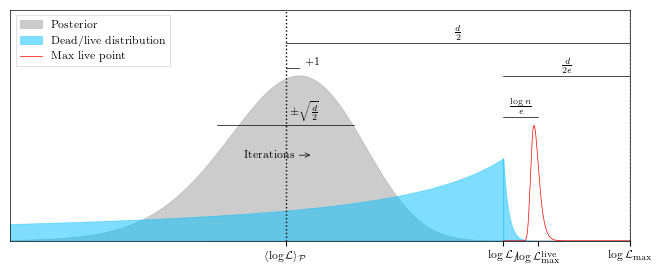

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from aeons.utils import figsettings

figsettings()
fig, ax = plt.subplots()

logLmax = 0
d = 50
n = 1000
avlogL = logLmax-d/2

logLs = logLmax-d/2/np.e
logLdead = np.linspace(logLmax-d/2-np.sqrt(d/2)*4, logLs, 1000)
logLlive = np.linspace(logLs,0,1000)
logLall = np.concatenate([logLdead, logLlive])

logpdf = logLall - logLmax + (d/2-1)*np.log(logLmax-logLall)
logpdf -= np.max(logpdf)
ax.fill(logLall, np.exp(logpdf), color='gray', alpha=.4, label='Posterior')

ldist = .5
pdf_dead = d/2 / (-logLdead) 
pdf_dead /= np.max(pdf_dead)
ax.fill_between(logLdead, 0, ldist*pdf_dead, color='deepskyblue', alpha=0.5, label='Dead/live distribution')

logpdf_live = (d/2-1) * np.log(logLmax - logLlive)
logpdf_live -= np.max(logpdf_live)
ax.fill_between(logLlive, 0, ldist*np.exp(logpdf_live), color='deepskyblue', alpha=0.5)


from scipy.special import logsumexp
logpdf_maxlive = (d/2-1)*np.log(logLmax - logLlive) + (n-1)* logsumexp([ d/2*np.log(logLmax-logLs)*np.ones_like(logLlive), d/2*np.log(logLmax-logLlive)] , b=[np.ones_like(logLlive),-np.ones_like(logLlive)], axis=0)
logpdf_maxlive -= np.max(logpdf_maxlive)
ax.plot(logLlive, .7*np.exp(logpdf_maxlive), lw=.5, color='red', label='Max live point')


logLmaxlive = logLmax - d/2/np.e + np.log(n)/np.e

pad_text = 0.02
l1 = 1.2
ax.axvline(avlogL, color='k', linestyle=':', lw=1)
ax.axvline(logLmax, color='k', linestyle=':', lw=1)
ax.plot([avlogL, logLmax], [l1,l1], 'k-', lw=.5)
ax.annotate(r'$\frac{d}{2}$', ((avlogL+logLmax)/2,l1+pad_text), ha='center', va='bottom', fontsize=8)

l2 = 0.7
ax.plot([avlogL-np.sqrt(d/2), avlogL+np.sqrt(d/2)], [l2, l2], 'k-', lw=.5)
ax.annotate(r'$\pm\sqrt{\frac{d}{2}}$', (avlogL+0.3,l2+pad_text), ha='left', va='bottom', fontsize=8)

l3 = 1.05
ax.plot([avlogL, avlogL+1], [l3, l3], 'k-', lw=.5)
ax.annotate(r'$+1$', (avlogL+2.5,l3), ha='right', va='bottom', fontsize=8)

l4 = 1 
ax.plot([logLs, logLmax], [l4, l4], 'k-', lw=.5)
ax.annotate(r'$\frac{d}{2e}$', ((logLmax+logLs)/2,l4+pad_text), ha='center', va='bottom', fontsize=8)

l5 = 0.75
ax.plot([logLs, logLmaxlive], [l5, l5], 'k-', lw=.5)
ax.annotate(r'$\frac{\log n}{e}$', ((logLs+logLmaxlive)/2,l5+pad_text), ha='center', va='bottom', fontsize=8)

ax.annotate("Iterations", xytext=(-28, 0.5), xy=(-23, 0.52), arrowprops=dict(arrowstyle="->"), fontsize=8)

ax.set_xticks([avlogL, 
               logLs, 
               logLmaxlive,
               logLmax])
ax.set_xticklabels([r'$\langle\log\mathcal{L}\rangle_\mathcal{P}$',
                    r'$\log\mathcal{L}_f$',
                    r'$\log\mathcal{L}_\mathrm{max}^\mathrm{live}$',
                    r'$\log\mathcal{L}_\mathrm{max}$'],
                    fontsize=8)

ax.set_yticks([])
ax.legend(loc='upper left', fontsize=8)
ax.set_ylim([0, 1.4])
ax.margins(x=0)

fig.set_size_inches(8, 3)
# fig.tight_layout()
# fig.autofmt_xdate(rotation=25)
# fig.savefig('logL_distribution.pdf', pad_inches=0, bbox_inches='tight')


In [7]:
from scipy.special import loggamma
yexact = 1 - np.exp(loggamma(1 + 2/d) + loggamma(1+n) - loggamma(1+n+2/d))
yexact

0.39072882949055576

In [8]:
2*np.log(n)/d

0.4605170185988091

$\log L = \log L_\mathrm{max} - \frac{1}{2\sigma^2} \exp({\frac{2}{d} \log X}) $

$ P(\log X) = \mathrm{const.}$

$ P(\log L) = P(\log X) \frac{\mathrm{d} \log X}{\mathrm{d} \log L} $

In [59]:
ndead = 5000
points = points_at_iteration(samples, ndead)
logXdead = points.logX().iloc[:ndead]

beta = 16/2 / (-points.logL.iloc[:ndead])

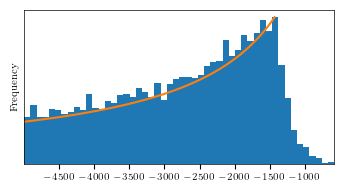

In [57]:
points.logL.drop_weights().plot.hist(bins=50)
plt.plot(points.logL.iloc[:ndead], beta*40000)

/tmp/ipykernel_54281/2363009991.py:19: RuntimeWarning: divide by zero encountered in log
  logpdf = logLall - logLmax + (d/2-1)*np.log(logLmax-logLall)
/tmp/ipykernel_54281/2363009991.py:23: RuntimeWarning: divide by zero encountered in log
  logpdf_live = (d/2-1) * np.log(logLmax - logLlive)


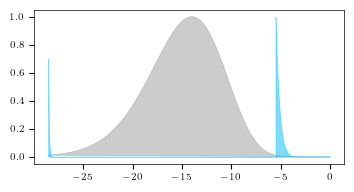

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from aeons.utils import figsettings

figsettings()
fig, ax = plt.subplots()

logLmax = 0
d = 30
n = 1000
avlogL = logLmax-d/2

logLs = logLmax-d/2/np.e
logLdead = np.linspace(logLmax-d/2-np.sqrt(d/2)*3.5, logLs, 1000)
logLlive = np.linspace(logLs,0,1000)
logLall = np.concatenate([logLdead, logLlive])

logpdf = logLall - logLmax + (d/2-1)*np.log(logLmax-logLall)
logpdf -= np.max(logpdf)
ax.fill(logLall, np.exp(logpdf), color='gray', alpha=.4, label='Posterior')

logpdf_live = (d/2-1) * np.log(logLmax - logLlive)
logpdf_live -= np.max(logpdf_live)
ax.fill_between(logLlive, 0, np.exp(logpdf_live), color='deepskyblue', alpha=0.5, label='Live points')

logpdf_dead = d/2 / (-logLdead) 
logpdf_dead -= np.max(logpdf_dead)
ax.fill_between(logLdead, 0, .7*np.exp(logpdf_dead), color='deepskyblue', alpha=0.5, label='Dead points')

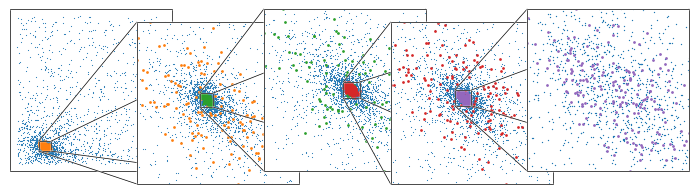

In [49]:
# import lecture_style
from anesthetic.examples.perfect_ns import planck_gaussian
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import numpy as np
from matplotlib import patheffects, rcParams
rcParams['path.effects'] = [patheffects.withStroke(linewidth=1, foreground='white')]
from aeons.utils import *

nlive = 100
samples = get_samples('planck_gaussian_100', reduced=False)[1]
ndeads = range(nlive*20, nlive*100, nlive*20)
prev = np.array([20, 40, 40, 40]) * nlive
fig, axes = plt.subplots(1,4, figsize=(7,2))

x = 'omegabh2'
y = 'omegach2'

for i, ax in enumerate(axes):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_box_aspect(1)
    points = samples.iloc[ndeads[i] - prev[i] : ndeads[i]]
    ax.scatter(points[x], points[y], s=0.1)
    # ax.scatter(samples[x], samples[y], s=0.1)

axes[0].get_children()[-1].get_zorder()
axes[0].set_zorder(10)
axes[0].get_children()[-1].get_zorder()

def get_box(i):
    live = samples.live_points(i)
    xmin = live[x].min()
    xmax = live[x].max()
    ymin = live[y].min()
    ymax = live[y].max()
    return xmin, xmax, ymin, ymax

def inter_axis_line(fig, ax0, ax1, x, y, *args, **kwargs):
    coord0 = fig.transFigure.inverted().transform(ax0.transData.transform([x, y]))
    coord1 = fig.transFigure.inverted().transform(ax1.transData.transform([x, y]))
    return Line2D([coord0[0], coord1[0]], [coord0[1], coord1[1]], transform=fig.transFigure,*args, **kwargs)

def draw_zoom_lines(ax0, ax1, xmin, xmax, ymin, ymax):
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    zorder = max([child.get_zorder() for child in ax0.get_children()] +
                 [ax0.get_zorder()])
    ax1.set_zorder(zorder+2)
    lines = list(fig.lines)
    for x_ in [xmin, xmax]:
        for y_ in [ymin, ymax]:
            lines.append(inter_axis_line(fig, ax0, ax1, x_, y_, color='k',
                                         zorder=zorder+1,
                                         lw=rcParams['axes.linewidth']))
    rect = Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, fill=False, color='k',
                     zorder=zorder+1, lw=rcParams['axes.linewidth'])
    ax0.add_patch(rect)
    fig.lines = lines


fig.tight_layout()
fig.canvas.draw()
fig.canvas.flush_events()
shift = 0.065

pos = axes[1].get_position()
pos.x0 -= shift
pos.x1 -= shift
pos.y0 -= shift
pos.y1 -= shift
axes[1].set_position(pos)

pos = axes[2].get_position()
pos.x0 -= shift*2
pos.x1 -= shift*2
axes[2].set_position(pos)

pos = axes[3].get_position()
pos.x0 -= shift*3
pos.x1 -= shift*3
pos.y0 -= shift
pos.y1 -= shift
axes[3].set_position(pos)

ax = fig.add_subplot(1,4,4)
ax.set_box_aspect(1)
ax.set_xticks([])
ax.set_yticks([])
ax.scatter(samples[x], samples[y], s=0.2)
axes = np.concatenate([axes, [ax]])

fig.canvas.draw()
fig.canvas.flush_events()
plot_live_points = True

for k, (i, ax0, ax1) in enumerate(zip(ndeads, axes[:-1], axes[1:])):
    if plot_live_points:    
        live = samples.live_points(i)
        ax0.scatter(live[x], live[y], s=2, color=f'C{k+1}')
        ax1.scatter(live[x], live[y], s=2, color=f'C{k+1}')
    draw_zoom_lines(ax0, ax1, *get_box(i))

fig.canvas.draw()
fig.canvas.flush_events()

if plot_live_points:
    filename = 'dead_measure_live.pdf'
else:
    filename = 'dead_measure.pdf'

fig.savefig(filename, transparent=False, bbox_inches='tight')